In [18]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

tf.random.set_seed(777)  # for reproducibility
print(tf.__version__)

fashion_mnist  = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
             'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


2.1.0


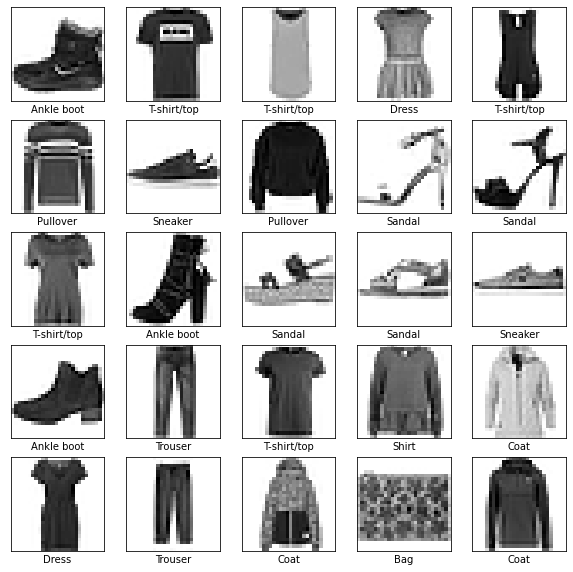

In [19]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # 실제 이미지는 28x28의 이미지 포맷을 784의 1차원 픽셀의 배열로 변환
    keras.layers.Dense(128, activation=tf.nn.relu), #밀집 연결 혹은 완전 연결이라고 하며, 
    keras.layers.Dense(10, activation=tf.nn.softmax) #10개의 모델 , 10개의 확률을 반환하고 반환된 값의 전체 합은 1
])

model.compile(optimizer ='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
#컴파일 단계에서 필요한 설정 추가

model.fit(train_images, train_labels, epochs=10)
#모델 훈련 과정, 훈련데이터(train_images & train_labels)를 모델에 주입
#모델이 이미지와 레이블을 매핑하는 법을 배운다.
#테스트 세트에 대한 모델의 예측만듬, 즉, test_images의 배열이 예측을 통해 test_labels 배의
#레이블과 맞는지 확인. epoch가 늘수록, accuracy값은 1에 가까워지지만, 시간이 오래걸린다.






Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.5016 - accuracy: 0.8259
Epoch 2/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3763 - accuracy: 0.8655
Epoch 3/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3365 - accuracy: 0.8766
Epoch 4/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3134 - accuracy: 0.8846
Epoch 5/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2966 - accuracy: 0.8906
Epoch 6/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2789 - accuracy: 0.8959
Epoch 7/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2684 - accuracy: 0.9006
Epoch 8/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2570 - accuracy: 0.9054
Epoch 9/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2492 - accuracy: 0.9061
Epoch 10/10
60

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

#overfitting 때문에 훈련세트 정확도와 테스트세트 정확도차이가 난다.

10000/10000 [==============================] - 0s 33us/sample - loss: 0.3511 - accuracy: 0.8759
Test accuracy: 0.8759


In [25]:
predictions = model.predict(test_images)

In [29]:
predictions[0]

array([6.1890351e-09, 6.4287409e-10, 7.6015314e-12, 1.9452823e-10,
       4.6690807e-10, 6.1761231e-05, 9.6826041e-09, 4.4623679e-03,
       6.7835154e-10, 9.9547583e-01], dtype=float32)

In [30]:
np.argmax(predictions[0])

9

In [32]:
test_labels[0]

9

In [46]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


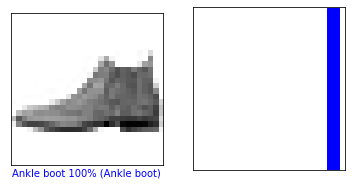

In [54]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

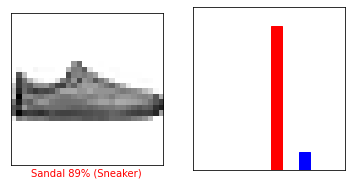

In [58]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

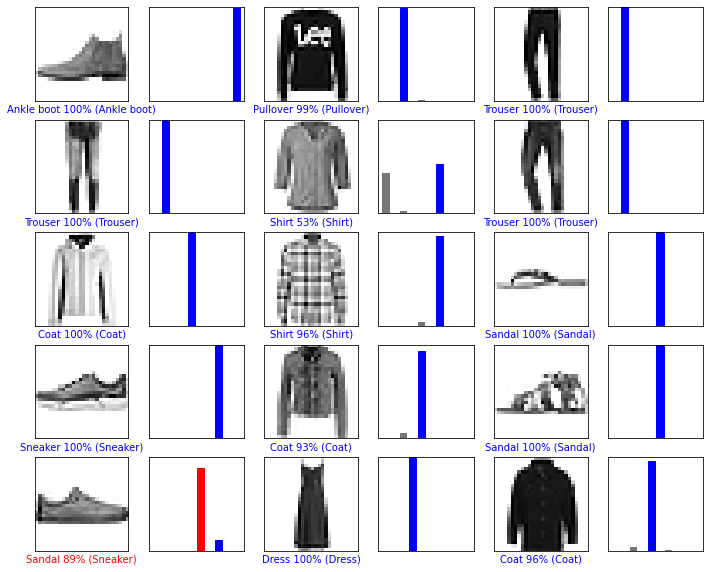

In [59]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()